<center><h1>Filtering images on the frequency spectrum</h1></center>

In this exercise we will be looking at what it means to work with an image in the frequency spectrum. For this you need to understand how the Fourier transform works and what  frequency means in an image. For some information about the theory behind this excercise check the next [link](https://homepages.inf.ed.ac.uk/rbf/HIPR2/fourier.htm).

 This exercise we will be working with three really basic images to make it easier to ilustrate what the theory says:

- The image 'triangulo.bmp'
- 'triangulodesp.bmp' which is the same image as the first but the triangle represented in the image has been moved.
- 'triangulozoom.bmp', the original imaged zoomed out
- 'triangulogirado.bmp', the origu¡inal but rotated

We will also be working with some functions that come with the exercise, lpfilter.py and surface_plot.py, make sure those files are in the same directory as this notebook.

In [5]:
import cv2
import numpy as np
from matplotlib import pyplot as plt
import lpfilter as lp
import surface_plot as sp
%matplotlib notebook

**I. Displaying the image in the frequency spectrum**

Using the function for the [fast fourier transform](https://numpy.org/doc/stable/reference/generated/numpy.fft.fft2.html) we will be taking the image 'triangulo.bmp' from the spatial to the frequency domain.

The output of the fft2 is a matrix the same size as the original image with complex numbers. We can't visualize complex numbers so the best option is to display the real (module) and the complex (angle) parts as separate images.

Display the original image, the module and angle of the fourier transform.


uint8


<IPython.core.display.Javascript object>


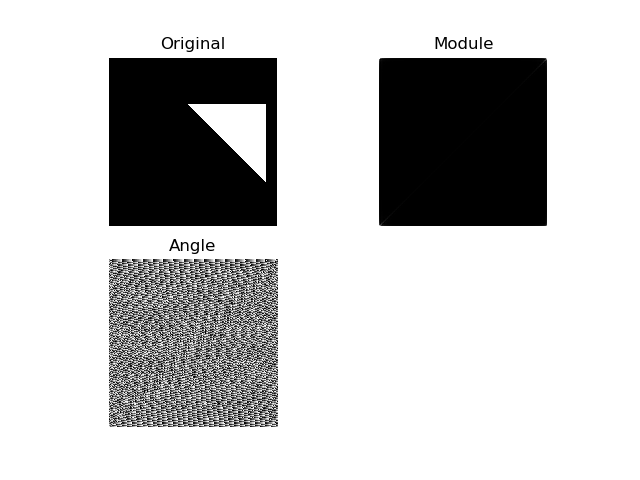

In [6]:
I = cv2.imread('triangulo.bmp',0)
print(I.dtype)

f = np.fft.fft2(I)

f_mod_ns = np.absolute(f)
f_phase_ns = np.angle(f)
plt.figure('FFT + No SHIFT')
plt.subplot(221), plt.imshow(I, cmap='gray'), plt.title('Original')
plt.xticks([]), plt.yticks([])  # this hides the axis ticks
for spine in plt.gca().spines.values():  #hide image border
    spine.set_visible(False)

plt.subplot(222), plt.imshow(f_mod_ns, cmap = 'gray'), plt.title('Module')
plt.xticks([]), plt.yticks([])  # this hides the axis ticks
for spine in plt.gca().spines.values():  #hide image border
    spine.set_visible(False)

plt.subplot(223),plt.imshow(f_phase_ns, cmap = 'gray'), plt.title('Angle')
plt.xticks([]), plt.yticks([])  # this hides the axis ticks
for spine in plt.gca().spines.values():  #hide image border
    spine.set_visible(False)

plt.show()

To see the module better here is the code to display it in a 3d graph(remember to change the variable names)

<IPython.core.display.Javascript object>


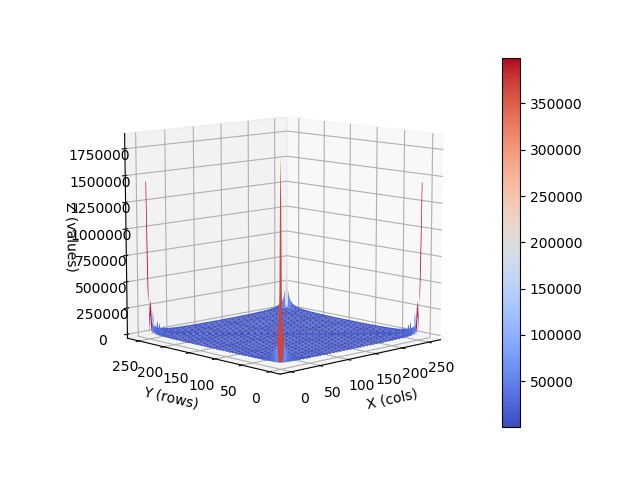

In [7]:
(fig, ax, surf) = sp.surface_plot(f_mod_ns, cmap=plt.cm.coolwarm)

fig.colorbar(surf)

ax.set_xlabel('X (cols)')
ax.set_ylabel('Y (rows)')
ax.set_zlabel('Z (values)')

plt.show()

When we represent the module in the frequency spectrum the low frequencies are in the corners while the high frequencies are in the center of the image, this is not very intuitive and can make it harder to understand. the funtion [np.fft.fftshift](https://numpy.org/doc/stable/reference/generated/numpy.fft.fftshift.html) transforms the image so the low frequencies are in the center and the high frequencies in the corners. 
Use fftshift on the fourier transform o 'triangle.bmp', represent the resulting module and angle.
To make it easier to see the details of the module apply a logarithmic transformation over it:
<code>f_log = np.log(f_mod+ 1)</code>

Display the original image, the shifted module and angle and the logarithm of the module.

[answer cell](#displayshift)

In [53]:
fshift = np.fft.fftshift(f)
f_mod = np.absolute(fshift)
f_phase = np.angle(fshift)
f_log = np.log(f_mod+ 1)

<IPython.core.display.Javascript object>


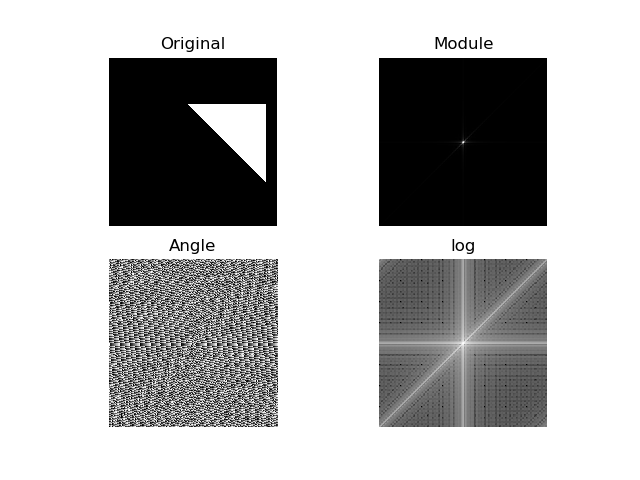

In [54]:
%matplotlib notebook
plt.figure('FFT + SHIFT')
plt.subplot(221), plt.imshow(I, cmap='gray'), plt.title('Original')
plt.xticks([]), plt.yticks([])  # this hides the axis ticks
for spine in plt.gca().spines.values():  #hide image border
    spine.set_visible(False)

plt.subplot(222), plt.imshow(f_mod, cmap = 'gray'), plt.title('Module')
plt.xticks([]), plt.yticks([])  # this hides the axis ticks
for spine in plt.gca().spines.values():  #hide image border
    spine.set_visible(False)

plt.subplot(223),plt.imshow(f_phase, cmap = 'gray'), plt.title('Angle')
plt.xticks([]), plt.yticks([])  # this hides the axis ticks
for spine in plt.gca().spines.values():  #hide image border
    spine.set_visible(False)

plt.subplot(224),plt.imshow(f_log, cmap = 'gray'), plt.title('log')
plt.xticks([]), plt.yticks([])  # this hides the axis ticks
for spine in plt.gca().spines.values():  #hide image border
    spine.set_visible(False)
plt.show()

**II. Properties of the fourier transform**

The objective of this segment is to ilustrate how changes in an image reflect on the frequency plane.

1. Display the image 'triangulodesp.bmp', its module and angle. Compre them to the original triangle, how does moving the triangle affect the module and angle of the image?

<IPython.core.display.Javascript object>


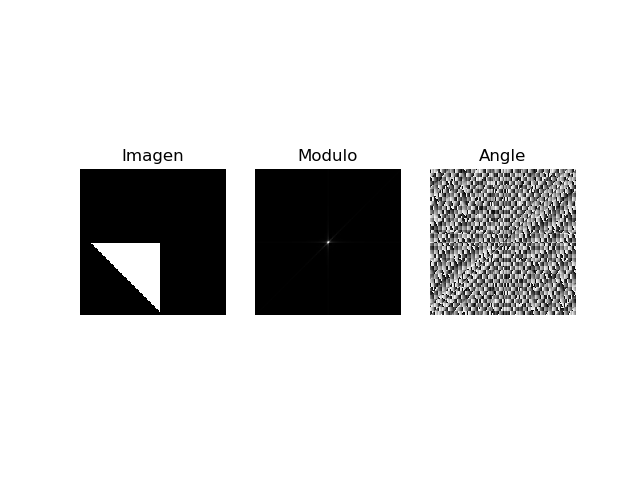

In [55]:
Idesp = cv2.imread('triangulodesp.bmp',0)
fdesp = np.fft.fft2(Idesp)
fdespshift = np.fft.fftshift(fdesp)
fdesp_mod = np.absolute(fdespshift)
fdesp_phase = np.angle(fdespshift)
plt.figure('desplazado')
plt.subplot(131), plt.imshow(Idesp, cmap = 'gray'), plt.title('Imagen')
plt.xticks([]), plt.yticks([])  # this hides the axis ticks
for spine in plt.gca().spines.values():  #hide image border
    spine.set_visible(False)
    
plt.subplot(132), plt.imshow(fdesp_mod, cmap = 'gray'), plt.title('Modulo')
plt.xticks([]), plt.yticks([])  # this hides the axis ticks
for spine in plt.gca().spines.values():  #hide image border
    spine.set_visible(False)


plt.subplot(133), plt.imshow(fdesp_phase, cmap = 'gray'), plt.title('Angle')
plt.xticks([]), plt.yticks([])  # this hides the axis ticks
for spine in plt.gca().spines.values():  #hide image border
    spine.set_visible(False)
plt.show()

2. Do the same with the image 'triangulo zoom.bmp'

<IPython.core.display.Javascript object>


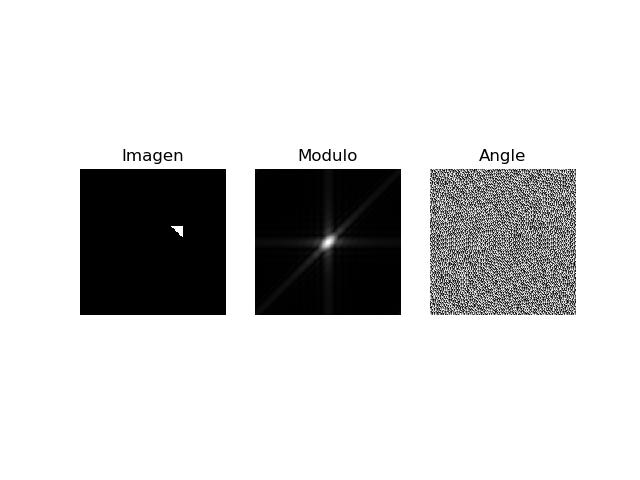

In [18]:
Izoom = cv2.imread('triangulozoom.bmp',0)
fzoom = np.fft.fft2(Izoom)
fzoomshift = np.fft.fftshift(fzoom)
fzoom_mod = np.absolute(fzoomshift)
fzoom_phase = np.angle(fzoomshift)
plt.figure('zoom')
plt.subplot(131), plt.imshow(Izoom, cmap = 'gray'), plt.title('Imagen')
plt.xticks([]), plt.yticks([])  # this hides the axis ticks
for spine in plt.gca().spines.values():  #hide image border
    spine.set_visible(False)
    
plt.subplot(132), plt.imshow(fzoom_mod, cmap = 'gray'), plt.title('Modulo')
plt.xticks([]), plt.yticks([])  # this hides the axis ticks
for spine in plt.gca().spines.values():  #hide image border
    spine.set_visible(False)


plt.subplot(133), plt.imshow(fzoom_phase, cmap = 'gray'), plt.title('Angle')
plt.xticks([]), plt.yticks([])  # this hides the axis ticks
for spine in plt.gca().spines.values():  #hide image border
    spine.set_visible(False)
plt.show()

3. Repeat for 'triangulogirado.bmp'

<IPython.core.display.Javascript object>


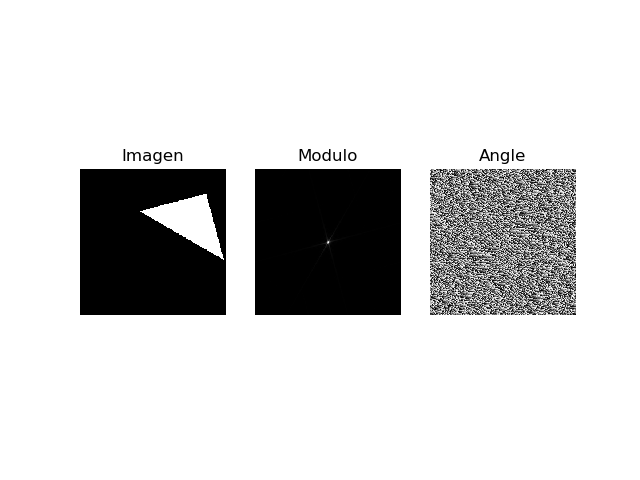

In [19]:
Iturn = cv2.imread('triangulogirado.bmp',0)
fturn = np.fft.fft2(Iturn)
fturnshift = np.fft.fftshift(fturn)
fturn_mod = np.absolute(fturnshift)
fturn_phase = np.angle(fturnshift)
plt.figure('girado')
plt.subplot(131), plt.imshow(Iturn, cmap = 'gray'), plt.title('Imagen')
plt.xticks([]), plt.yticks([])  # this hides the axis ticks
for spine in plt.gca().spines.values():  #hide image border
    spine.set_visible(False)
    
plt.subplot(132), plt.imshow(fturn_mod, cmap = 'gray'), plt.title('Modulo')
plt.xticks([]), plt.yticks([])  # this hides the axis ticks
for spine in plt.gca().spines.values():  #hide image border
    spine.set_visible(False)


plt.subplot(133), plt.imshow(fturn_phase, cmap = 'gray'), plt.title('Angle')
plt.xticks([]), plt.yticks([])  # this hides the axis ticks
for spine in plt.gca().spines.values():  #hide image border
    spine.set_visible(False)
plt.show()

Looking at the images, cand you justify why some transformations affect the module while others affect the angle using the theory?

**III. Low Pass filters**

Now we will be looknig at two different low pass filters, the ideal filter and the gaussian filter. 
An ideal filter has a value of 1 on all frequencies under Do, and 0 an all other frequencies
The gaussian filter follows the gaussian distribution to form the bell (when the low frequencies are represented in the center).

Use the function lpfilter from the given script to generate 6 filters, 3 ideal filters with Do values of 10, 30 and 50 and three Gaussian filters with the same values Do. The function returns a matrix with values between 0 and 1. 

- Display in a 3D graph the gaussian filter with Do=30, do the same for the ideal filter.

[answer cell](#lpfilters)

In [21]:
G10 = lp.lpfilter('gaussian', 256, 256, 10)
G30 = lp.lpfilter('gaussian', 256, 256, 30)
G50 = lp.lpfilter('gaussian', 256, 256, 50)

H10 = lp.lpfilter('ideal', 256,256, 10)
H30 = lp.lpfilter('ideal', 256,256, 30)
H50 = lp.lpfilter('ideal', 256,256, 50)

<IPython.core.display.Javascript object>


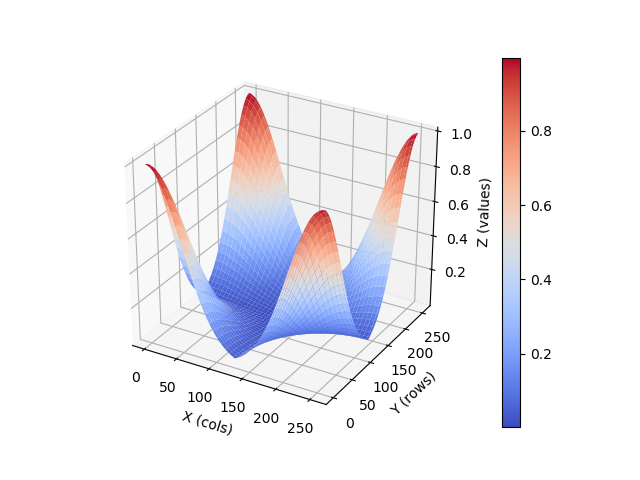

<IPython.core.display.Javascript object>


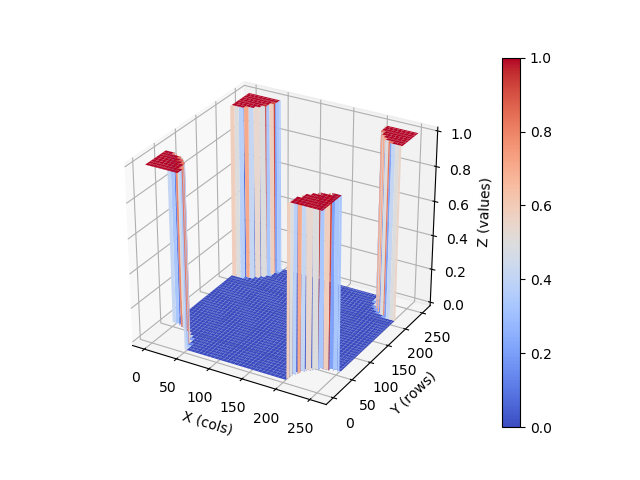

In [23]:
%matplotlib notebook
(fig2, ax2, surf) = sp.surface_plot(G50, cmap=plt.cm.coolwarm)

fig2.colorbar(surf)

ax2.set_xlabel('X (cols)')
ax2.set_ylabel('Y (rows)')
ax2.set_zlabel('Z (values)')

plt.show()

(fig3, ax3, surf) = sp.surface_plot(H50, cmap=plt.cm.coolwarm)

fig3.colorbar(surf)

ax3.set_xlabel('X (cols)')
ax3.set_ylabel('Y (rows)')
ax3.set_zlabel('Z (values)')

plt.show()

- Now filter the image 'triangle.bmp' with the ideal filter. 

To filter an image in space you would use convolution, but in the frequency domain a convolutionis a multiplication, so to filter the imge multiply it's fourier transform by the filter (remember to use [np.multiply](https://numpy.org/doc/stable/reference/generated/numpy.multiply.html), repeat for each of the sizes of the filter. 

Use the [inverse fast fourier transform](https://numpy.org/doc/stable/reference/generated/numpy.fft.ifft2.html) to go from frequency to space and display them to see the effect of the filter.

In [24]:
F_H10 = np.multiply(f, H10)
S_H10 = np.fft.ifft2(F_H10)
S_H10 = np.real(S_H10)

F_H30 = np.multiply(f, H30)
S_H30 = np.fft.ifft2(F_H30)
S_H30 = np.real(S_H30)

F_H50 = np.multiply(f, H50)
S_H50 = np.fft.ifft2(F_H50)
S_H50 = np.real(S_H50)


<IPython.core.display.Javascript object>


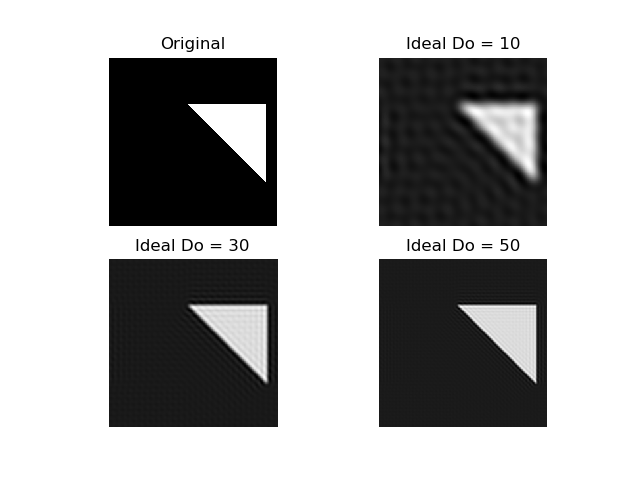

In [25]:
plt.figure('Filtro ideal')
plt.subplot(221), plt.imshow(I, cmap='gray'), plt.title('Original')
plt.xticks([]), plt.yticks([])  # this hides the axis ticks
for spine in plt.gca().spines.values():  #hide image border
    spine.set_visible(False)

plt.subplot(222), plt.imshow(S_H10, cmap = 'gray'), plt.title('Ideal Do = 10')
plt.xticks([]), plt.yticks([])  # this hides the axis ticks
for spine in plt.gca().spines.values():  #hide image border
    spine.set_visible(False)

plt.subplot(223),plt.imshow(S_H30, cmap = 'gray'), plt.title('Ideal Do = 30')
plt.xticks([]), plt.yticks([])  # this hides the axis ticks
for spine in plt.gca().spines.values():  #hide image border
    spine.set_visible(False)

plt.subplot(224),plt.imshow(S_H50, cmap = 'gray'), plt.title('Ideal Do = 50')
plt.xticks([]), plt.yticks([])  # this hides the axis ticks
for spine in plt.gca().spines.values():  #hide image border
    spine.set_visible(False)
plt.show()

- Repeat last section with the Gaussian filter

In [26]:
F_G10 = np.multiply(f, G10)
S_G10 = np.fft.ifft2(F_G10)
S_G10 = np.real(S_G10)

F_G30 = np.multiply(f, G30)
S_G30 = np.fft.ifft2(F_G30)
S_G30 = np.real(S_G30)

F_G50 = np.multiply(f, G50)
S_G50 = np.fft.ifft2(F_G50)
S_G50 = np.real(S_G50)

<IPython.core.display.Javascript object>


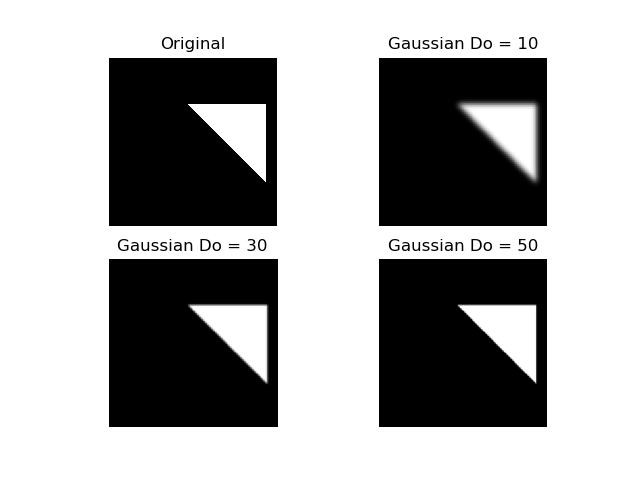

In [27]:
plt.figure('Filtro Gaussiano')
plt.subplot(221), plt.imshow(I, cmap='gray'), plt.title('Original')
plt.xticks([]), plt.yticks([])  # this hides the axis ticks
for spine in plt.gca().spines.values():  #hide image border
    spine.set_visible(False)

plt.subplot(222), plt.imshow(S_G10, cmap = 'gray'), plt.title('Gaussian Do = 10')
plt.xticks([]), plt.yticks([])  # this hides the axis ticks
for spine in plt.gca().spines.values():  #hide image border
    spine.set_visible(False)

plt.subplot(223),plt.imshow(S_G30, cmap = 'gray'), plt.title('Gaussian Do = 30')
plt.xticks([]), plt.yticks([])  # this hides the axis ticks
for spine in plt.gca().spines.values():  #hide image border
    spine.set_visible(False)

plt.subplot(224),plt.imshow(S_G50, cmap = 'gray'), plt.title('Gaussian Do = 50')
plt.xticks([]), plt.yticks([])  # this hides the axis ticks
for spine in plt.gca().spines.values():  #hide image border
    spine.set_visible(False)
plt.show()

Compare the results of the two fiters. Can you explain the ondulation effects caused by the ideal filter?

[answer cell](#lpfilterstriangle)

IV. Filtrado Paso Alto en el dominio frecuencial

Justifique de manera teórica qué esperaría obtener al aplicar un filtro paso alto a la imagen
'triangulo.bmp'. Explique detalladamente cómo debería ser el módulo de la imagen resultante.
Haga uso de la función lpfilter del apartado anterior para diseñar en el dominio frecuencial un
filtro paso alto ideal y otro filtro paso alto con transiciones suaves en la banda de paso. Considere
D0 = 100 en ambos casos. Realice el filtrado de la imagen 'triangulo.bmp' con los dos filtros
anteriores y almacene en las variables FPA_ideal y FPA_gauss las imágenes filtradas en el dominio
espacial. Anote la secuencia de comandos utilizada para realizar los dos filtrados.

**IV. High pass filter**

A high pass filter can be seen as an inverted low pass filter, that's why to create a high pass filter we will be using the function lpfilter with Do= 100, this gives us a very wide low pass filter, to go from this to a high pass we have to invert it, turn the zeroes into ones and the ones into zeroes, keep in mind that we need al thel numbers in the filter to be positive.
Create an ideal and a gaussian high pass filter, display them as 3d graphs.

In [28]:
G100 = 1- lp.lpfilter('gaussian', 256, 256, 100)
H100 = 1- lp.lpfilter('ideal', 256, 256, 100)

<IPython.core.display.Javascript object>


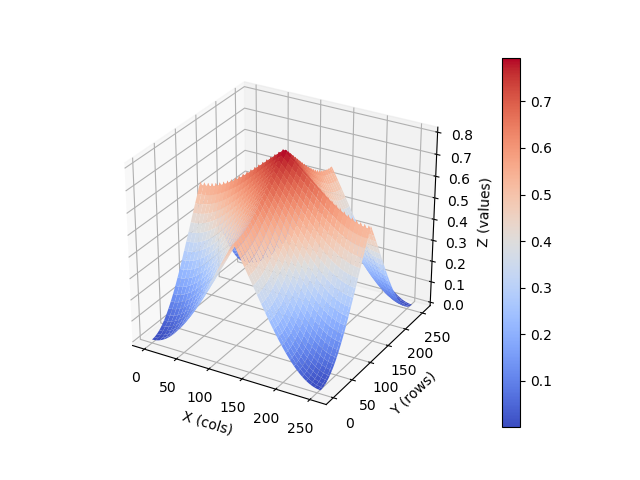

<IPython.core.display.Javascript object>


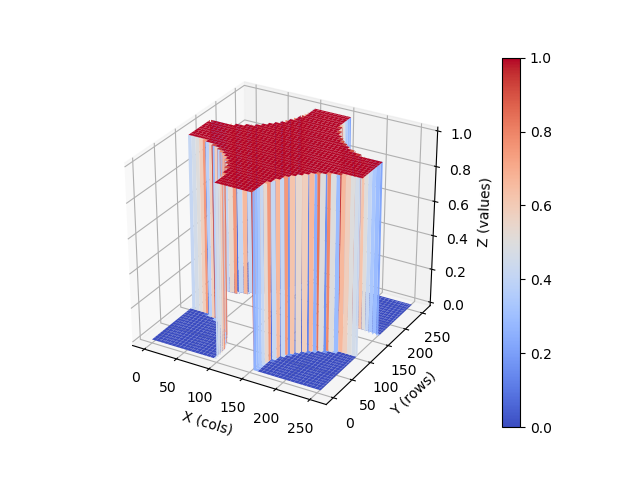

In [29]:
(fig4, ax4, surf) = sp.surface_plot(G100, cmap=plt.cm.coolwarm)

fig4.colorbar(surf)

ax4.set_xlabel('X (cols)')
ax4.set_ylabel('Y (rows)')
ax4.set_zlabel('Z (values)')

plt.show()

(fig5, ax5, surf) = sp.surface_plot(H100, cmap=plt.cm.coolwarm)

fig5.colorbar(surf)

ax5.set_xlabel('X (cols)')
ax5.set_ylabel('Y (rows)')
ax5.set_zlabel('Z (values)')

plt.show()

Now filter the image 'triangulo.bmp' the same way you did with the low pass filter. And display the results.

[answer cell](#hptriangle)

In [61]:
F_G100 = np.multiply(f, G100)
S_G100 = np.fft.ifft2(F_G100)
S_G100 = np.absolute(S_G100)


F_H100 = np.multiply(f, H100)
S_H100 = np.fft.ifft2(F_H100)
S_H100 = np.absolute(S_H100)


<IPython.core.display.Javascript object>


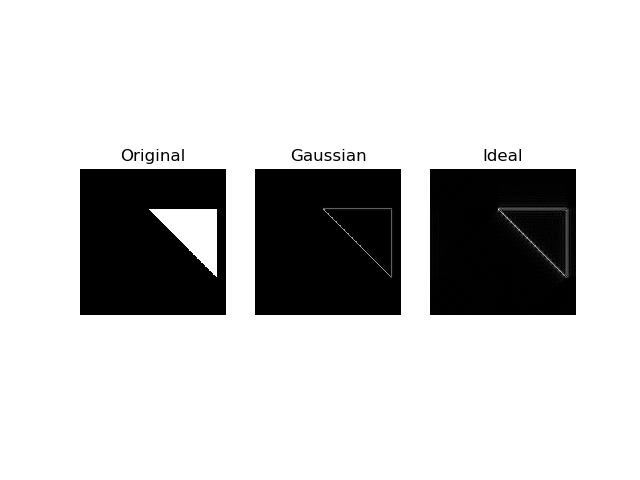

In [57]:
plt.figure('Filtro paso alto')
plt.subplot(131), plt.imshow(I, cmap='gray'), plt.title('Original')
plt.xticks([]), plt.yticks([])  # this hides the axis ticks
for spine in plt.gca().spines.values():  #hide image border
    spine.set_visible(False)

plt.subplot(132), plt.imshow(S_G100, cmap = 'gray'), plt.title('Gaussian')
plt.xticks([]), plt.yticks([])  # this hides the axis ticks
for spine in plt.gca().spines.values():  #hide image border
    spine.set_visible(False)

plt.subplot(133),plt.imshow(S_H100, cmap = 'gray'), plt.title('Ideal')
plt.xticks([]), plt.yticks([])  # this hides the axis ticks
for spine in plt.gca().spines.values():  #hide image border
    spine.set_visible(False)

plt.show()

The result is not as polished as the theory says, to see way it may be usefull to check out the 3d representations of the filtered images. Can you understand where the problem comes from?

<IPython.core.display.Javascript object>


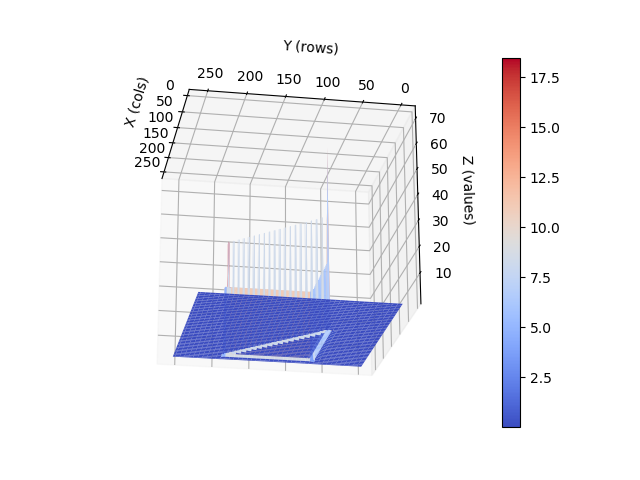

<IPython.core.display.Javascript object>


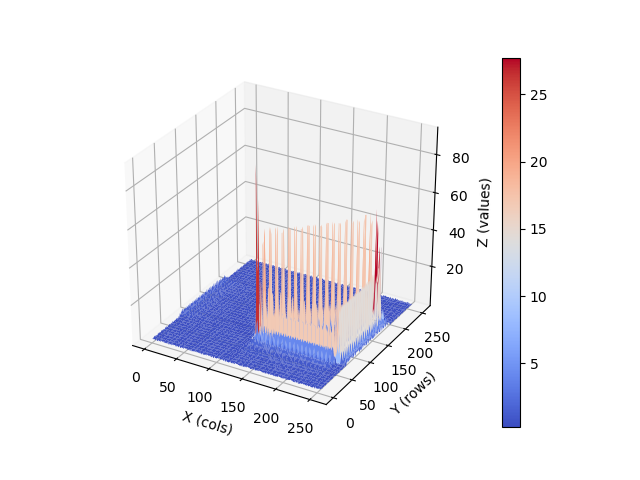

In [58]:
(fig6, ax6, surf) = sp.surface_plot(S_G100, cmap=plt.cm.coolwarm)

fig6.colorbar(surf)

ax6.set_xlabel('X (cols)')
ax6.set_ylabel('Y (rows)')
ax6.set_zlabel('Z (values)')

plt.show()

(fig7, ax7, surf) = sp.surface_plot(S_H100, cmap=plt.cm.coolwarm)

fig7.colorbar(surf)

ax7.set_xlabel('X (cols)')
ax7.set_ylabel('Y (rows)')
ax7.set_zlabel('Z (values)')

plt.show()

To get a better result get a binary image of the filtered images choose the threshold so the pixels associated with a change in intensity have a value of one, display the resulting images. Which filter gives a better result, ideal or gaussian?

[answer cell](#betterhp)

In [59]:
umbral = 10

II = 255*S_H100
[thresh, Idealbinario] = cv2.threshold(S_H100, umbral, 255, cv2.THRESH_BINARY)

IG = np.uint8(255*S_G100)
[thresh, Gaussbinario] = cv2.threshold(S_G100, umbral, 255, cv2.THRESH_BINARY)

<IPython.core.display.Javascript object>


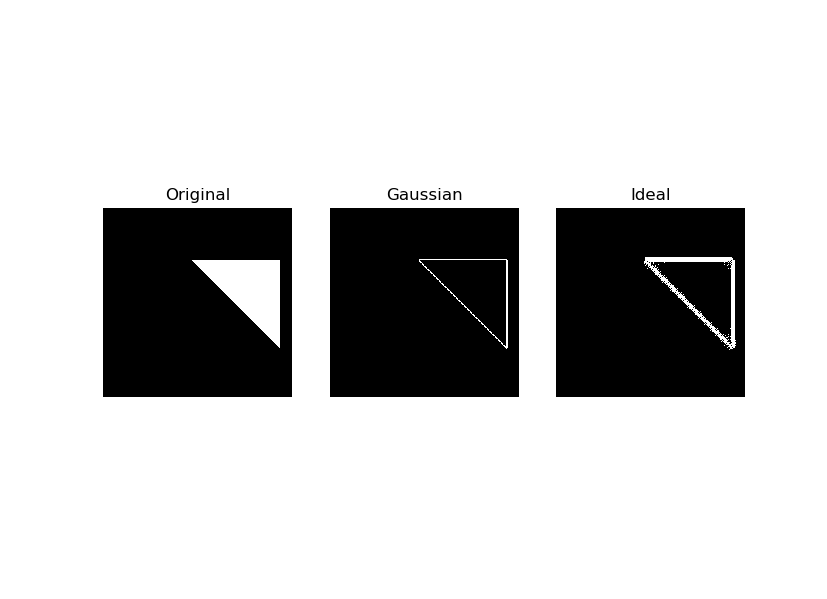

In [60]:
plt.figure('Filtro paso alto + binario')
plt.subplot(131), plt.imshow(I, cmap='gray'), plt.title('Original')
plt.xticks([]), plt.yticks([])  # this hides the axis ticks
for spine in plt.gca().spines.values():  #hide image border
    spine.set_visible(False)

plt.subplot(132), plt.imshow(Gaussbinario, cmap = 'gray'), plt.title('Gaussian')
plt.xticks([]), plt.yticks([])  # this hides the axis ticks
for spine in plt.gca().spines.values():  #hide image border
    spine.set_visible(False)

plt.subplot(133),plt.imshow(Idealbinario, cmap = 'gray'), plt.title('Ideal')
plt.xticks([]), plt.yticks([])  # this hides the axis ticks
for spine in plt.gca().spines.values():  #hide image border
    spine.set_visible(False)

plt.show()

<h2>Cells with the answer images</h2>

Displaying the image in the frequency spectrum

<a id='displayshift'></a>

![displayshift](answerimages/displayshift.PNG)


Low pass filters

<a id='lpfilters'></a>

![gaussian](answerimages/gaussian.PNG)
![ideal](answerimages/ideal.PNG)


Applying low pass filters

<a id='lpfiltertriangle'></a>

![lpideal](answerimages/lpideal.PNG)
![lpgaussian](answerimages/lpgaussian.PNG)

High pass filter

<a id='hptriangle'></a>

![hpfilter](answerimages/hpfilter.PNG)

Improved high pass
<a id='betterhp'></a>

![betterhp](answerimages/betterhp.PNG)